In [1]:
import pandas as pd
import os
import cv2

from src.inference import *
from src.segment import *

## Inference Data

Must be in the form of a Pandas Dataframe where the first three columns are X, Y, Z

In [2]:
image = '/Users/andrijapaurevic/Documents/uWaterloo/research/mainCSG/QuantumDotControl/autotuning/data/bias_triangles/processed/test/test_44_1_sim_blocked.jpg'
image = cv2.imread(image)
image = cv2.rotate(image, cv2.ROTATE_180)

## Set-Up Model

/Users/andrijapaurevic/miniforge3/envs/detectron2/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[1, 1] ['unblocked', 'blocked']


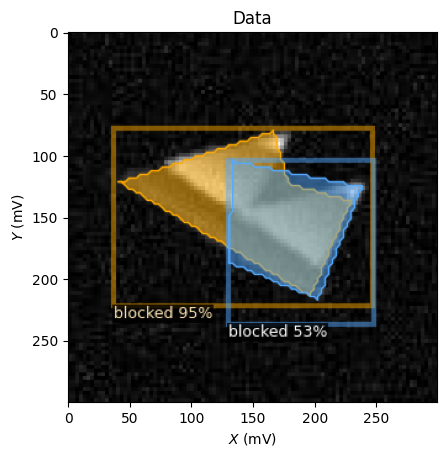

In [3]:
# Load trained model path
model_path = os.path.join("../models/bias_triangles", "model_bias_triangles_5000.pth")  # path to the model we just trained
config_path = "./src/config.yaml"
model_name = 'psb'
processor='cpu'

outputs, metadata, image = inference_image(image,
                                    model_path,
                                    config_path,
                                    model_name,
                                    processor,
                                    polygon_threshold=6,
                                    confidence_threshold=0.5,
                                    plot_predictions=True
                                    )

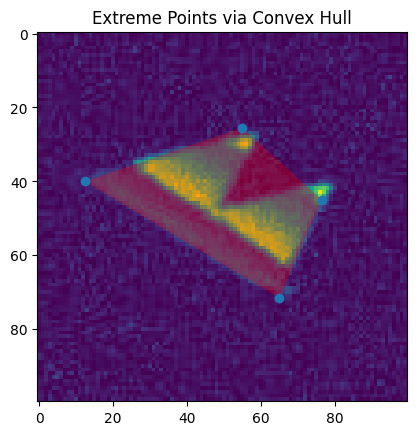

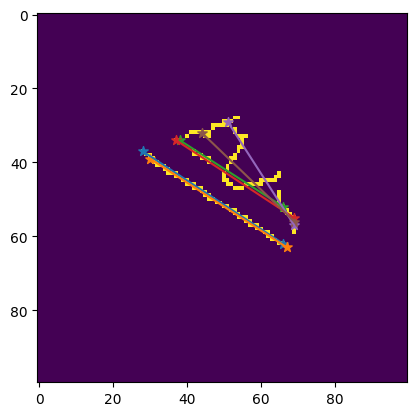

Fitted Mean: 0.6496663536391117
Fitted Standard Deviation: 0.01345229463377111


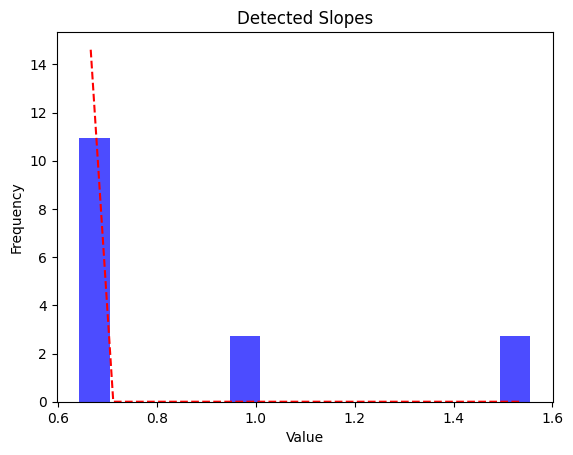

CHull indices with the highest prob and highest dist: (0, 1)


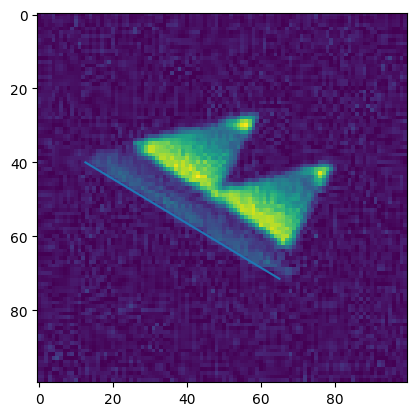

In [6]:
mask = outputs['instances'].pred_masks[0]
bl = extract_baseline(image[:,:,-1], mask.numpy(), 5)

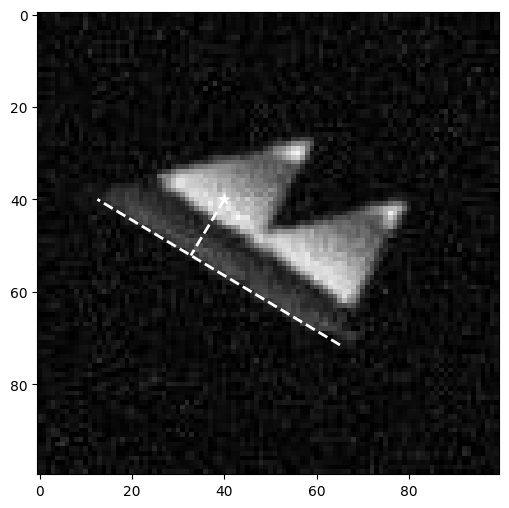

In [7]:
point = [40,40]
extract_detuning_path(image, point, bl)